Sentiment Analysis

## VADER - Bag of Words approach

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt') #VScode didn't run a few nltk modules without downloading

[nltk_data] Downloading package punkt to /Users/sid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
#read data
df = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-TheUniversityofTexasatDallas/Projects/Sentiment Analysis/Vader Roberta/Reviews.csv')

In [13]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [14]:
print(df['Text'].values[0])
print(df.shape)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
(568454, 10)


In [15]:
#Reduce to first 500 records only
df = df.head(500)
df.shape

(500, 10)

EDA

Text(0, 0.5, 'Count of Reviews')

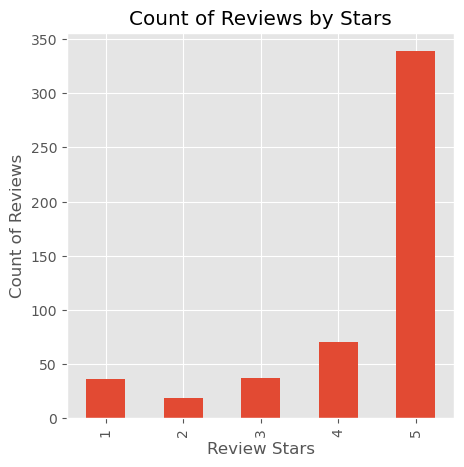

In [16]:
ax = df['Score'].value_counts().sort_index()\
    .plot(kind='bar', title='Count of Reviews by Stars',figsize=(5,5))

ax.set_xlabel('Review Stars')
ax.set_ylabel('Count of Reviews')

### Basic NLTK

In [17]:
example = df["Text"][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [18]:
#Tokenize the input into words

nltk.download('punkt') #VScode didn't run a few nltk modules without downloading

tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to /Users/sid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [19]:
#Get part of speach tags for tokens
nltk.download('averaged_perceptron_tagger') #VScode didn't run a few nltk modules without downloading
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sid/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [23]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/sid/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/sid/nltk_data...


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


[nltk_data]   Unzipping corpora/words.zip.


## VADER
Valence Aware Dictionary and sEntiment Reasoner
: Bag of words approach

- Stop words are removed
- each word is scored and combined to a total score.

In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sid/nltk_data...


In [26]:
sia.polarity_scores('This keyboard is so good!')

{'neg': 0.0, 'neu': 0.498, 'pos': 0.502, 'compound': 0.6166}

In [27]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [28]:
#Run Polarity Scores on entire df
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
    

100%|██████████| 500/500 [00:00<00:00, 2685.59it/s]


In [29]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [30]:
#convert polarity scores into dataframe and transpose
vaders = pd.DataFrame(res).T

#Add Id to the dataframe
vaders = vaders.reset_index()\
        .rename(columns = {'index':'Id'})

#Merge polarity scores with original dataset
vaders = vaders.merge(df, how='left') 

In [31]:
#Sentiment Score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Barplot of data

<Axes: xlabel='Score', ylabel='compound'>

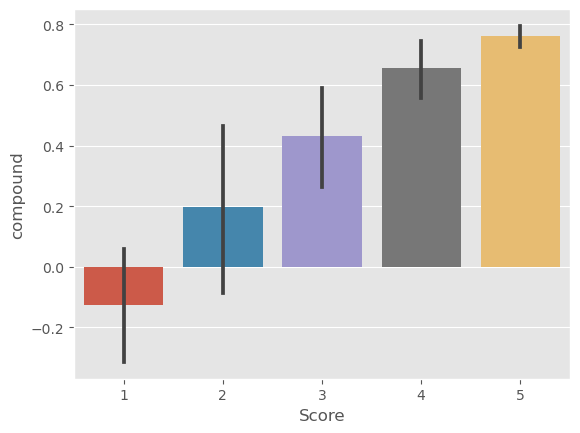

In [32]:
# view barplot of compund vs score
sns.barplot(data=vaders, x='Score', y='compound')


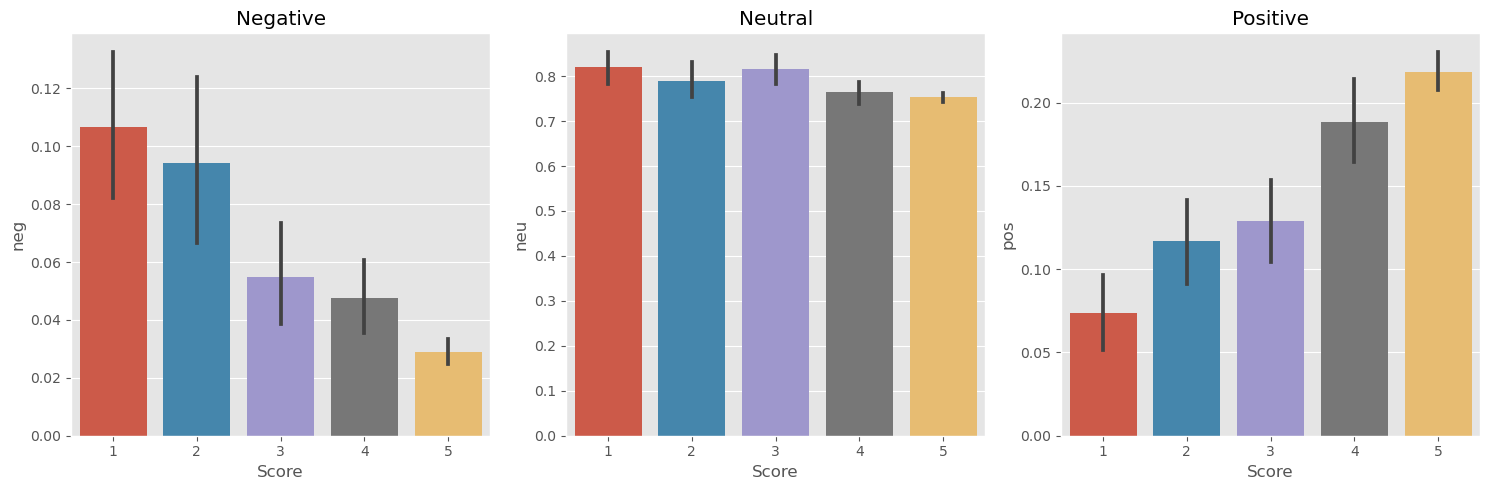

In [33]:
# See POS, NEG and NEU together
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[2])
axs[0].set_title('Negative')
axs[1].set_title('Neutral')
axs[2].set_title('Positive')

plt.tight_layout()
plt.show()


## Roberta Pretrained Model
- Using Hugging face transformer model for not just getting sentiment based on words/token, but also the context related to other words
- These are pretrained models trained on large corpus of data.

Requires pytorch on your kernel. If you're installing it now, you will need to restart your kernel

In [34]:
#pip install transformers
from transformers import AutoTokenizer #similar to NLTK
from transformers import AutoModelForSequenceClassification #hugging face model
from scipy.special import softmax # get clear distinction between pos and neg

In [35]:
#conda install pytorch torchvision -c pytorch

In [36]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/Users/sid/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [38]:
# Run tokenizer with Roberta model
encoded_text = tokenizer(example, return_tensors ='pt')
output = model(**encoded_text)
output


SequenceClassifierOutput(loss=None, logits=tensor([[ 2.5818, -0.5665, -2.5625]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [45]:
#Take tensor and converty to numpy
scores = output[0][0].detach().numpy()
scores = softmax(scores) # put it in a scale of 0 to 1
scores
#neg, Neu, Pos scores are displayed

array([0.9535124 , 0.04092636, 0.00556124], dtype=float32)

In [47]:
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)

{'roberta_neg': 0.9535124, 'roberta_neu': 0.040926356, 'roberta_pos': 0.005561244}


In [48]:
#VADER model scores for reference
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

Define function to return Polarity scores for reboerta model

In [50]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors= 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores) # put it in a scale of 0 to 1
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

## Combine results

In [53]:
#iterate through reviews and store both vader and reberta scores in combined matrix

results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_results = sia.polarity_scores(text)
        vader_results_rename = {}
        for key, value in vader_results.items():        #loop to save vader results with pos, neu and neg tags
            vader_results_rename[f"vader_{key}"] = value
        
        roberta_result = polarity_scores_roberta(text)
        combined = {**vader_results_rename, **roberta_result}
        results[myid] = combined
    except RuntimeError:
        print(f'error at id {myid}')

 17%|█▋        | 84/500 [00:05<00:30, 13.76it/s]

error at id 83


 38%|███▊      | 190/500 [00:14<00:18, 16.44it/s]

error at id 187


100%|██████████| 500/500 [00:36<00:00, 13.75it/s]


In [59]:
#check on exception ids
print(df['Text'][83])
print(df['Text'][187])

While my dogs like all of the flavors that we have tried of this dog food, for some reason their itching increased when I tried the lamb and rice. I have some very itchy dogs and am giving them a limited ingredient dog food to try to help. The duck and sweet potato cut down on the itching significantly, but when we tried lamb and rice they started itching more once again. I like Natural Balance for the quality ingredients.
My Scotties were full of hot spots and when I used this within a week all the hot spots were gone. The smell is kinda strong, but not bad. It's tolerablel.


In [65]:
#transform these results into Dataframes
results_df = pd.DataFrame(results).T
results_df = results_df.reset_index().rename(columns ={'index':'Id'})
results_df = results_df.merge(df, how='left')

results_df.head(3)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.010578,0.038816,0.950607,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.716768,0.271225,0.012007,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.005176,0.077858,0.916966,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


## Compare scores between models

In [66]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

/Users/sid/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


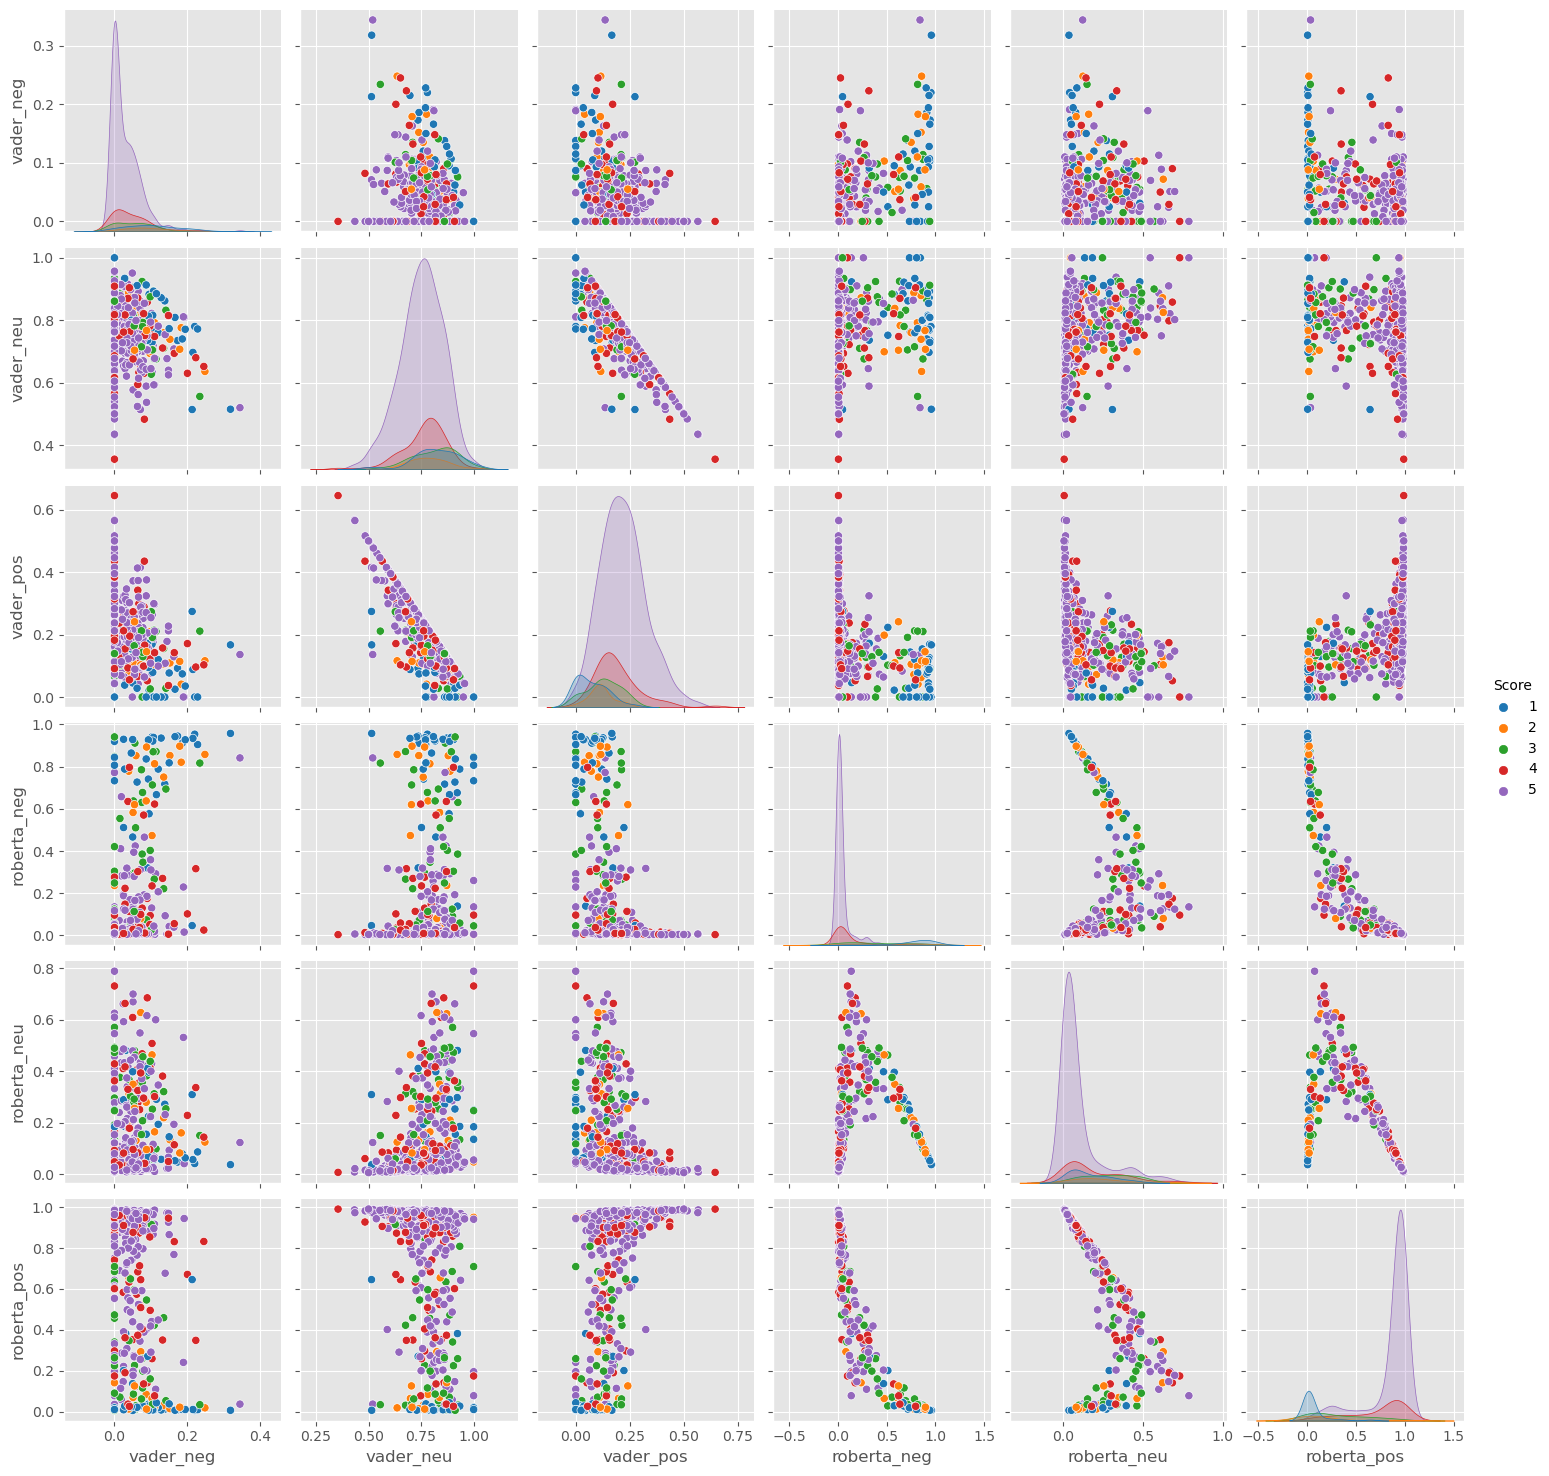

In [69]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
            'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue= 'Score',
             palette = 'tab10')
plt.show()

### Understanding
- Roberta model appears to be more confident with its prediction as standard deviation is smaller than that of Vader model.
- Vader model rarely assigns high pos or neg scores
- 

### Review Examples manually

In [80]:
# High rating but sentiment analysed to be highly negative
print(results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0])

print(results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0])

this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault
this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault


In [83]:
# Low rating but sentiment analysed to be highly positive
print(results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0])

print(results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0])

So we cancelled the order.  It was cancelled without any problem.  That is a positive note...
So we cancelled the order.  It was cancelled without any problem.  That is a positive note...


## Transformers Pipeline
- Quick and easy wat to run sentiment prediction using hugging face sentiment analysis pipeline

In [84]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [99]:
sent_pipeline('This product does could be better. It is just good')

[{'label': 'POSITIVE', 'score': 0.9997859597206116}]